<a href="https://colab.research.google.com/github/Darkling-01/Airbnb-Machine-Learning/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is for Machine Learning CSE5160

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from google.colab import files

print("SETUP COMPLETE...")

SETUP COMPLETE...


In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airbnb_data.csv')
dataset

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [ ]:
print('Number of rows in the dataframe:', dataset.shape[0])
print('Number of columns in the dataframe:', dataset.shape[1])

Number of rows in the dataframe: 74111
Number of columns in the dataframe: 29


In [ ]:
dataset.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [13]:
#finding attitional info about our data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [37]:
#selecting features that I will be using for the model
data = dataset[['log_price', 'id', 'review_scores_rating']]
data.head()

,log_price,id,review_scores_rating
0,5.010635,6901257,100.0
1,5.129899,6304928,93.0
2,4.976734,7919400,92.0
3,6.620073,13418779,NaN
4,4.744932,3808709,40.0


In [39]:
#Remove NaN from review_scores_rating
# Create the dataframe
data = data.dropna(subset=['review_scores_rating'])
# dropping the rows having NaN values
data = data.dropna()
# printing the result
data

,log_price,id,review_scores_rating
0,5.010635,6901257,100.0
1,5.129899,6304928,93.0
2,4.976734,7919400,92.0
4,4.744932,3808709,40.0
5,4.442651,12422935,100.0
...,...,...,...
74104,4.356709,14934112,100.0
74105,4.248495,808802,91.0
74107,5.043425,13281809,93.0
74108,5.220356,18688039,94.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f742c344550>,
      dtype=object)

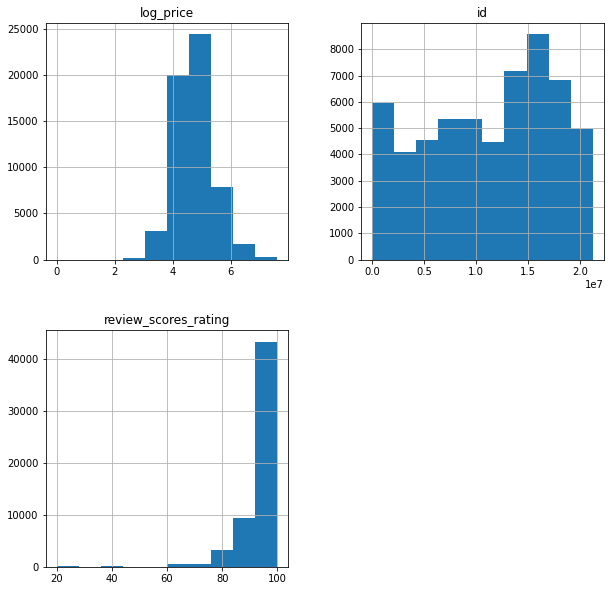

In [40]:
#plot data with its value count
data.hist(figsize = (10,10))

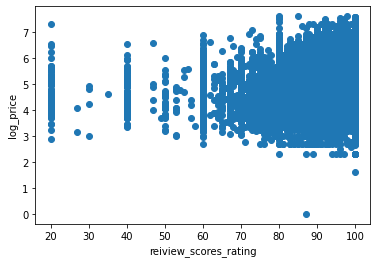

In [43]:
plt.scatter(data['review_scores_rating'], data['log_price'])
plt.xlabel("reiview_scores_rating")
plt.ylabel("log_price")
plt.show()

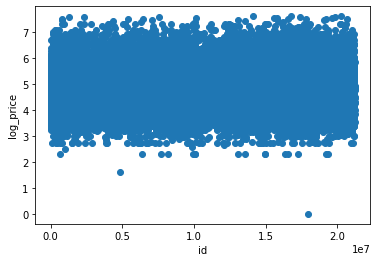

In [44]:
plt.scatter(data['id'], data['log_price'])
plt.xlabel("id")
plt.ylabel("log_price")
plt.show()

In [45]:
#80% data for training and 20% for testing
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

print("Training Data: ", train.shape)
print("Testing Data: ", test.shape)
print("Total Data: ", data.shape)

Training Data:  (45911, 3)
Testing Data:  (11478, 3)
Total Data:  (57389, 3)


In [46]:
#finding the mean of log_price
price = data['log_price']
sum_price = price.sum()
num_places = len(price)
avg_prices1 = sum_price/num_places
avg_prices2 = price.mean()
print(avg_prices1)
print(avg_prices2)

4.749232313018211
4.749232313018211
